In [1]:
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression

#for warning 
from warnings import filterwarnings
filterwarnings("ignore")

2025-02-18 14:27:05.329560: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df_raw = pd.read_csv("/Users/user/Downloads/TrafficNG/traffic_weather_data_lagos.csv")
df_raw

,city,origin,destination,distance_km,distance_meters,duration_normal_mins,duration_in_traffic_mins,traffic_ratio,timestamp,day_of_week,...,humidity_percent,pressure_hpa,weather_condition,weather_description,wind_speed_ms,wind_direction_degrees,cloud_coverage_percent,visibility_meters,rain_1h_mm,rain_3h_mm
0,Lagos,Ikeja,Victoria Island,28.8 km,28821,37,32,0.861810,2025-01-17T22:17:27.105376+01:00,Friday,...,84.0,1011.0,Clear,clear sky,3.2,226.0,10.0,10000.0,0.00,0.0
1,Lagos,Lekki Phase 1,Victoria Island,8.3 km,8311,15,13,0.836649,2025-01-17T22:17:28.541775+01:00,Friday,...,84.0,1011.0,Clear,clear sky,3.2,226.0,10.0,10000.0,0.00,0.0
2,Lagos,Surulere,Victoria Island,13.3 km,13301,20,18,0.874299,2025-01-17T22:17:29.385468+01:00,Friday,...,84.0,1011.0,Clear,clear sky,3.2,226.0,10.0,10000.0,0.00,0.0
3,Lagos,Ajah,Victoria Island,21.7 km,21694,41,37,0.905592,2025-01-17T22:17:30.207684+01:00,Friday,...,84.0,1011.0,Clear,clear sky,3.2,226.0,10.0,10000.0,0.00,0.0
4,Lagos,Ikorodu,Victoria Island,40.8 km,40829,59,49,0.831747,2025-01-17T22:17:31.455323+01:00,Friday,...,84.0,1011.0,Clear,clear sky,3.2,226.0,10.0,10000.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12948,Lagos,Surulere,Victoria Island,13.3 km,13301,20,22,1.098937,2025-02-18T14:14:29.134305+01:00,Tuesday,...,58.0,1008.0,Rain,light rain,2.8,203.0,100.0,10000.0,0.17,0.0
12949,Lagos,Ajah,Victoria Island,23.5 km,23540,42,46,1.088396,2025-02-18T14:14:30.568196+01:00,Tuesday,...,58.0,1008.0,Rain,light rain,2.8,203.0,100.0,10000.0,0.17,0.0
12950,Lagos,Ikorodu,Victoria Island,41.3 km,41265,58,57,0.982906,2025-02-18T14:14:31.758800+01:00,Tuesday,...,58.0,1008.0,Rain,light rain,2.8,203.0,100.0,10000.0,0.17,0.0
12951,Lagos,Oshodi,Apapa,18.6 km,18635,38,38,0.997847,2025-02-18T14:14:33.034876+01:00,Tuesday,...,58.0,1008.0,Rain,light rain,2.8,203.0,100.0,10000.0,0.17,0.0


In [34]:
# Display basic information
display(df_raw.info())
display(df_raw.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12953 entries, 0 to 12952
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype                    
---  ------                    --------------  -----                    
 0   city                      12953 non-null  object                   
 1   origin                    12953 non-null  object                   
 2   destination               12953 non-null  object                   
 3   distance_km               0 non-null      float64                  
 4   distance_meters           12953 non-null  int64                    
 5   duration_normal_mins      12953 non-null  int64                    
 6   duration_in_traffic_mins  12953 non-null  int64                    
 7   traffic_ratio             12953 non-null  float64                  
 8   timestamp                 12953 non-null  datetime64[ns, UTC+01:00]
 9   day_of_week               12953 non-null  object                   
 10  is_weekend

None

,city,origin,destination,distance_km,distance_meters,duration_normal_mins,duration_in_traffic_mins,traffic_ratio,timestamp,day_of_week,...,humidity_percent,pressure_hpa,weather_condition,weather_description,wind_speed_ms,wind_direction_degrees,cloud_coverage_percent,visibility_meters,rain_1h_mm,rain_3h_mm
0,Lagos,Ikeja,Victoria Island,NaN,28821,37,32,0.861810,2025-01-17 22:17:27.105376+01:00,Friday,...,84.0,1011.0,Clear,clear sky,3.2,226.0,10.0,10000.0,0.0,0.0
1,Lagos,Lekki Phase 1,Victoria Island,NaN,8311,15,13,0.836649,2025-01-17 22:17:28.541775+01:00,Friday,...,84.0,1011.0,Clear,clear sky,3.2,226.0,10.0,10000.0,0.0,0.0
2,Lagos,Surulere,Victoria Island,NaN,13301,20,18,0.874299,2025-01-17 22:17:29.385468+01:00,Friday,...,84.0,1011.0,Clear,clear sky,3.2,226.0,10.0,10000.0,0.0,0.0
3,Lagos,Ajah,Victoria Island,NaN,21694,41,37,0.905592,2025-01-17 22:17:30.207684+01:00,Friday,...,84.0,1011.0,Clear,clear sky,3.2,226.0,10.0,10000.0,0.0,0.0
4,Lagos,Ikorodu,Victoria Island,NaN,40829,59,49,0.831747,2025-01-17 22:17:31.455323+01:00,Friday,...,84.0,1011.0,Clear,clear sky,3.2,226.0,10.0,10000.0,0.0,0.0


In [3]:
# Convert 'distance_km' to numeric
df_raw['distance_km'] = pd.to_numeric(df_raw['distance_km'], errors='coerce')

# Convert 'timestamp' to datetime format
df_raw['timestamp'] = pd.to_datetime(df_raw['timestamp'], errors='coerce')


In [4]:
# Handle missing values - Fill weather-related missing values with median
weather_cols = ['temperature_c', 'humidity_percent', 'wind_speed_ms', 'rain_1h_mm', 'rain_3h_mm','visibility_meters','pressure_hpa','wind_direction_degrees','cloud_coverage_percent']
df_raw[weather_cols] = df_raw[weather_cols].fillna(df_raw[weather_cols].median())

# Remove duplicates
#df_raw = df_raw.drop_duplicates()

In [5]:
# Outlier detection and removal using IQR
Q1 = df_raw[['traffic_ratio', 'duration_in_traffic_mins']].quantile(0.25)
Q3 = df_raw[['traffic_ratio', 'duration_in_traffic_mins']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df_raw[
    (df_raw['traffic_ratio'] >= lower_bound['traffic_ratio']) & (df_raw['traffic_ratio'] <= upper_bound['traffic_ratio']) &
    (df_raw['duration_in_traffic_mins'] >= lower_bound['duration_in_traffic_mins']) & (df_raw['duration_in_traffic_mins'] <= upper_bound['duration_in_traffic_mins'])
]

In [6]:
df_cleaned.drop('distance_km', axis=1, inplace=True)

In [7]:
#filter out locations 
locations_to_filter = ['Ajah','Festac','Ikeja','Lekki Phase 1','Oshodi','Surulere'] 
df_Ikorodu = df_cleaned[~df_cleaned['origin'].isin(locations_to_filter)]

In [8]:
df_Ikorodu

,city,origin,destination,distance_meters,duration_normal_mins,duration_in_traffic_mins,traffic_ratio,timestamp,day_of_week,is_weekend,...,humidity_percent,pressure_hpa,weather_condition,weather_description,wind_speed_ms,wind_direction_degrees,cloud_coverage_percent,visibility_meters,rain_1h_mm,rain_3h_mm
4,Lagos,Ikorodu,Victoria Island,40829,59,49,0.831747,2025-01-17 22:17:31.455323+01:00,Friday,False,...,84.0,1011.0,Clear,clear sky,3.20,226.0,10.0,10000.0,0.00,0.0
11,Lagos,Ikorodu,Victoria Island,40829,59,49,0.827548,2025-01-17 22:23:51.059725+01:00,Friday,False,...,84.0,1011.0,Clear,clear sky,3.20,226.0,10.0,10000.0,0.00,0.0
18,Lagos,Ikorodu,Victoria Island,40829,59,48,0.813270,2025-01-17 22:39:07.654512+01:00,Friday,False,...,85.0,1011.0,Clouds,few clouds,2.97,228.0,14.0,10000.0,0.00,0.0
25,Lagos,Ikorodu,Victoria Island,40829,59,48,0.808231,2025-01-17 22:54:28.247239+01:00,Friday,False,...,85.0,1011.0,Clouds,few clouds,2.97,228.0,14.0,10000.0,0.00,0.0
32,Lagos,Ikorodu,Victoria Island,40829,59,46,0.784155,2025-01-17 23:09:45.453118+01:00,Friday,False,...,85.0,1011.0,Clouds,few clouds,2.97,228.0,14.0,10000.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12926,Lagos,Ikorodu,Victoria Island,41265,58,58,1.006838,2025-02-18 13:06:48.541659+01:00,Tuesday,False,...,62.0,1009.0,Rain,light rain,2.83,212.0,100.0,10000.0,0.10,0.0
12930,Lagos,Ikorodu,Victoria Island,41265,58,58,0.991738,2025-02-18 13:25:08.535478+01:00,Tuesday,False,...,62.0,1009.0,Rain,light rain,2.83,212.0,100.0,10000.0,0.10,0.0
12936,Lagos,Ikorodu,Victoria Island,41265,58,57,0.979487,2025-02-18 13:41:15.389431+01:00,Tuesday,False,...,58.0,1008.0,Rain,light rain,2.80,203.0,100.0,10000.0,0.17,0.0
12943,Lagos,Ikorodu,Victoria Island,41265,58,57,0.984615,2025-02-18 13:58:52.372138+01:00,Tuesday,False,...,58.0,1008.0,Rain,light rain,2.80,203.0,100.0,10000.0,0.17,0.0


In [9]:
# Define target variable
target_col = 'traffic_ratio'  # Change if needed
if target_col not in df_Ikorodu.columns:
    raise ValueError(f"Target column '{target_col}' not found in dataset")

In [10]:
y = df_Ikorodu[target_col]
df_features = df_Ikorodu.drop(columns=[target_col])


In [11]:
# Drop non-numeric columns (if any)
df_numeric = df_features.select_dtypes(include=[np.number])

# Handle missing values (fill with mean of each column)
df_numeric = df_numeric.fillna(df_numeric.mean())

In [12]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA
pca = PCA()
pca.fit(df_scaled)


PCA()

In [13]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_


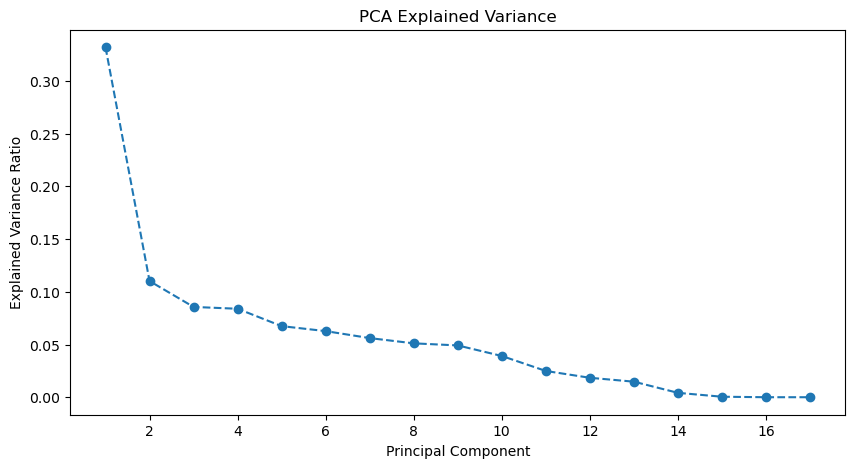

In [14]:
# Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.show()



In [15]:
# Identify number of components that explain 95% variance
num_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(df_scaled)



In [16]:
# Compute correlation with target variable
mi_scores = mutual_info_regression(principal_components, y)



In [17]:
# Get feature importance
feature_importance = np.abs(pca.components_).mean(axis=0)
feature_names = df_numeric.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))


In [18]:
# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display top important features
print("Top Important Features for Traffic Congestion Prediction:")
for feature, importance in sorted_features[:15]:  # Show top 10 features
    print(f"{feature}: {importance:.4f}")

Top Important Features for Traffic Congestion Prediction:
rain_1h_mm: 0.2610
pressure_hpa: 0.2379
visibility_meters: 0.2375
wind_direction_degrees: 0.2321
num_alternative_routes: 0.2259
cloud_coverage_percent: 0.2149
duration_in_traffic_mins: 0.2119
hour_of_day: 0.2107
duration_normal_mins: 0.1903
distance_meters: 0.1729
route_complexity: 0.1614
steps_count: 0.1546
wind_speed_ms: 0.1499
temperature_c: 0.1486
humidity_percent: 0.1375


rain_1h_mm: 0.2610
pressure_hpa: 0.2379
visibility_meters: 0.2375
wind_direction_degrees: 0.2321
num_alternative_routes: 0.2259
cloud_coverage_percent: 0.2149
duration_in_traffic_mins: 0.2119
hour_of_day: 0.2107
duration_normal_mins: 0.1903
distance_meters: 0.1729
route_complexity: 0.1614
steps_count: 0.1546
wind_speed_ms: 0.1499
temperature_c: 0.1486
humidity_percent: 0.1375


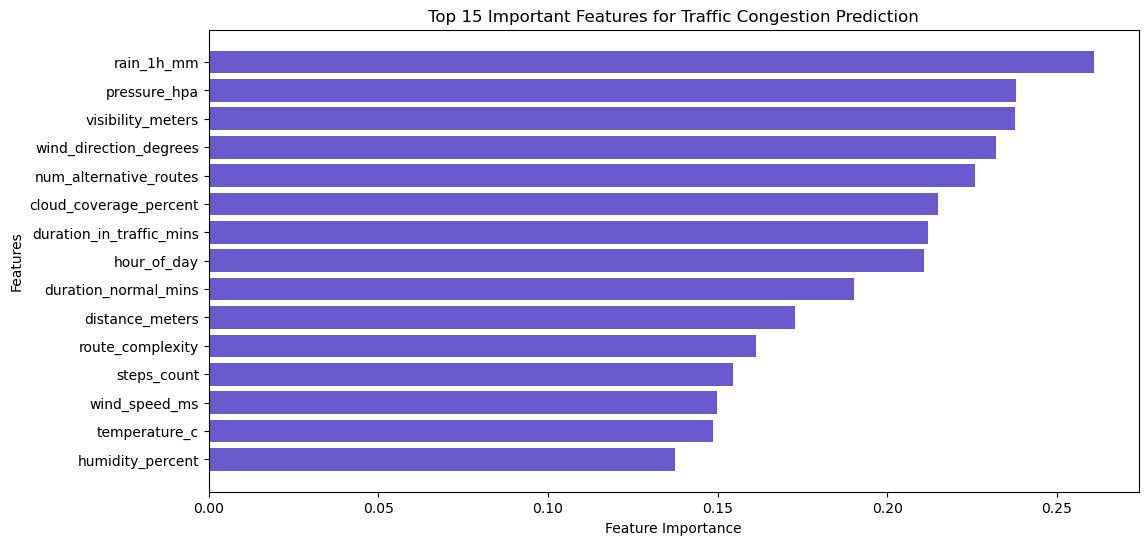

In [19]:
top_features = sorted_features[:15]  # Show top 10 features
for feature, importance in top_features:
    print(f"{feature}: {importance:.4f}")

# Plot top important features
plt.figure(figsize=(12, 6))
plt.barh([x[0] for x in reversed(top_features)], [x[1] for x in reversed(top_features)], color='slateblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 15 Important Features for Traffic Congestion Prediction')
plt.show()


In [20]:
#selected_features = ['pressure_hpa','wind_direction_degrees','cloud_coverage_percent','wind_speed_ms','temperature_c','humidity_percent']


In [21]:
selected_features = ['traffic_ratio','num_alternative_routes','visibility_meters','duration_in_traffic_mins','duration_normal_mins','distance_meters',
                    'route_complexity','hour_of_day','rain_1h_mm','pressure_hpa','wind_direction_degrees',
                     'cloud_coverage_percent','wind_speed_ms','temperature_c','humidity_percent','weather_condition','timestamp','day_of_week']
df_selected = df_Ikorodu[selected_features]

In [22]:
df_selected

,traffic_ratio,num_alternative_routes,visibility_meters,duration_in_traffic_mins,duration_normal_mins,distance_meters,route_complexity,hour_of_day,rain_1h_mm,pressure_hpa,wind_direction_degrees,cloud_coverage_percent,wind_speed_ms,temperature_c,humidity_percent,weather_condition,timestamp,day_of_week
4,0.831747,2,10000.0,49,59,40829,0.465356,22,0.00,1011.0,226.0,10.0,3.20,27.21,84.0,Clear,2025-01-17 22:17:31.455323+01:00,Friday
11,0.827548,2,10000.0,49,59,40829,0.465356,22,0.00,1011.0,226.0,10.0,3.20,27.21,84.0,Clear,2025-01-17 22:23:51.059725+01:00,Friday
18,0.813270,2,10000.0,48,59,40829,0.465356,22,0.00,1011.0,228.0,14.0,2.97,27.05,85.0,Clouds,2025-01-17 22:39:07.654512+01:00,Friday
25,0.808231,2,10000.0,48,59,40829,0.465356,22,0.00,1011.0,228.0,14.0,2.97,27.05,85.0,Clouds,2025-01-17 22:54:28.247239+01:00,Friday
32,0.784155,2,10000.0,46,59,40829,0.465356,23,0.00,1011.0,228.0,14.0,2.97,27.05,85.0,Clouds,2025-01-17 23:09:45.453118+01:00,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12926,1.006838,0,10000.0,58,58,41265,0.508906,13,0.10,1009.0,212.0,100.0,2.83,31.32,62.0,Rain,2025-02-18 13:06:48.541659+01:00,Tuesday
12930,0.991738,0,10000.0,58,58,41265,0.508906,13,0.10,1009.0,212.0,100.0,2.83,31.32,62.0,Rain,2025-02-18 13:25:08.535478+01:00,Tuesday
12936,0.979487,0,10000.0,57,58,41265,0.508906,13,0.17,1008.0,203.0,100.0,2.80,32.05,58.0,Rain,2025-02-18 13:41:15.389431+01:00,Tuesday
12943,0.984615,0,10000.0,57,58,41265,0.508906,13,0.17,1008.0,203.0,100.0,2.80,32.05,58.0,Rain,2025-02-18 13:58:52.372138+01:00,Tuesday


In [23]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1708 entries, 4 to 12950
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype                    
---  ------                    --------------  -----                    
 0   traffic_ratio             1708 non-null   float64                  
 1   num_alternative_routes    1708 non-null   int64                    
 2   visibility_meters         1708 non-null   float64                  
 3   duration_in_traffic_mins  1708 non-null   int64                    
 4   duration_normal_mins      1708 non-null   int64                    
 5   distance_meters           1708 non-null   int64                    
 6   route_complexity          1708 non-null   float64                  
 7   hour_of_day               1708 non-null   int64                    
 8   rain_1h_mm                1708 non-null   float64                  
 9   pressure_hpa              1708 non-null   float64                  
 10  wind_direction_d

In [24]:
df_selected_numeric = df_selected.select_dtypes(include=[np.number])
def describe(df):
    return pd.concat([df.describe().T, df.skew().rename('skew'),], axis=1)

describe(df_selected_numeric)

,count,mean,std,min,25%,50%,75%,max,skew
traffic_ratio,1708.0,0.938821,0.124645,0.712766,0.831467,0.944845,1.029787,1.243305,0.130610
num_alternative_routes,1708.0,0.649297,0.630660,0.000000,0.000000,1.000000,1.000000,2.000000,0.441878
visibility_meters,1708.0,9994.107143,135.238658,6773.000000,10000.000000,10000.000000,10000.000000,10000.000000,-23.775127
duration_in_traffic_mins,1708.0,54.998829,7.287871,42.000000,49.000000,55.000000,60.000000,72.000000,0.196387
duration_normal_mins,1708.0,58.509953,0.798663,58.000000,58.000000,58.000000,59.000000,63.000000,2.029422
distance_meters,1708.0,41166.542155,354.779478,39945.000000,40829.000000,41265.000000,41265.000000,43157.000000,1.437458
route_complexity,1708.0,0.498420,0.031855,0.375516,0.465356,0.508906,0.508906,0.692322,1.402399
hour_of_day,1708.0,12.335480,6.771471,0.000000,7.000000,13.000000,18.000000,23.000000,-0.208185
rain_1h_mm,1708.0,0.022927,0.106714,0.000000,0.000000,0.000000,0.000000,1.500000,7.904352
pressure_hpa,1708.0,1009.262881,1.941283,1005.000000,1008.000000,1009.000000,1011.000000,1014.000000,-0.040352


In [25]:
df_selected.isna().sum()

traffic_ratio                0
num_alternative_routes       0
visibility_meters            0
duration_in_traffic_mins     0
duration_normal_mins         0
distance_meters              0
route_complexity             0
hour_of_day                  0
rain_1h_mm                   0
pressure_hpa                 0
wind_direction_degrees       0
cloud_coverage_percent       0
wind_speed_ms                0
temperature_c                0
humidity_percent             0
weather_condition           11
timestamp                    0
day_of_week                  0
dtype: int64

In [26]:
plot_cols = ['temperature_c','rain_1h_mm','pressure_hpa','wind_speed_ms','cloud_coverage_percent','traffic_ratio']

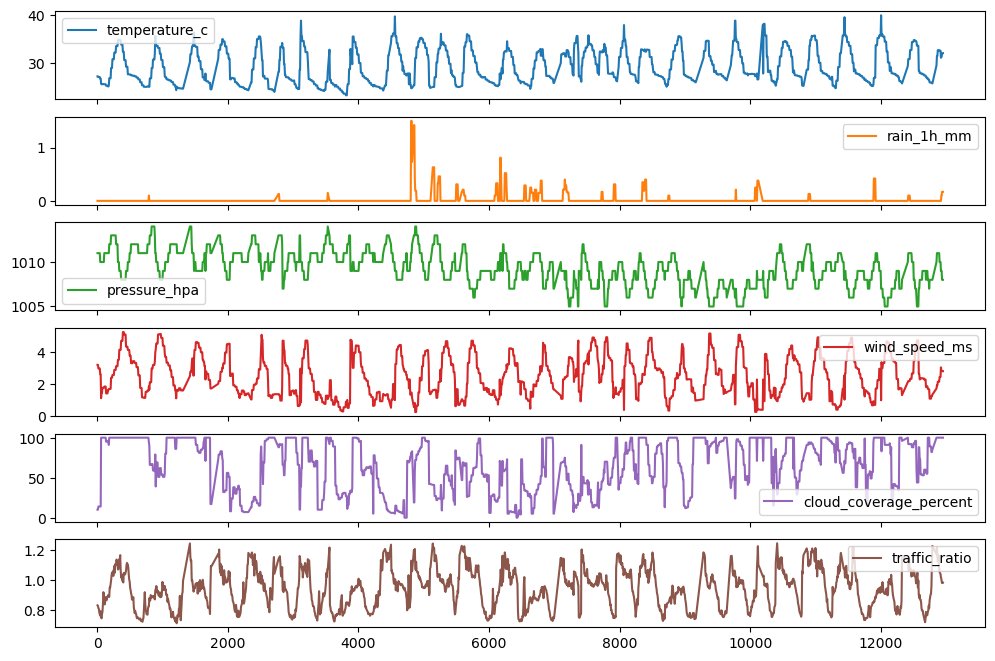

In [27]:
plot_features = df_selected[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

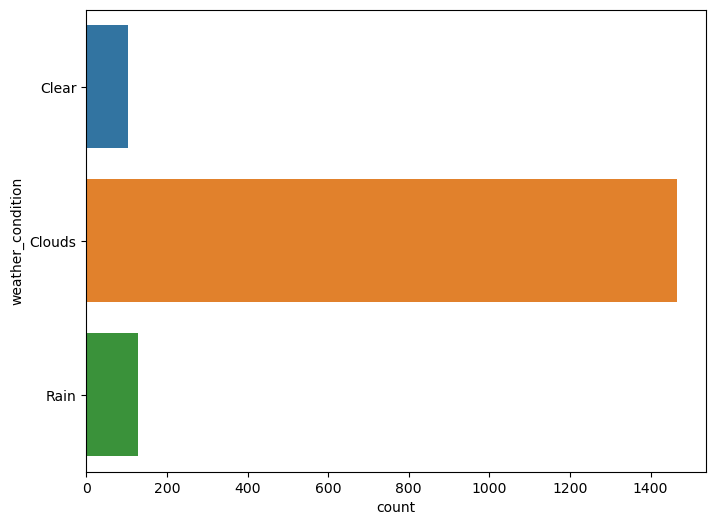

In [29]:
#distribution of weather conditions 
plt.figure(figsize = (8,6))
sns.countplot(y='weather_condition', data = df_selected)
plt.show()

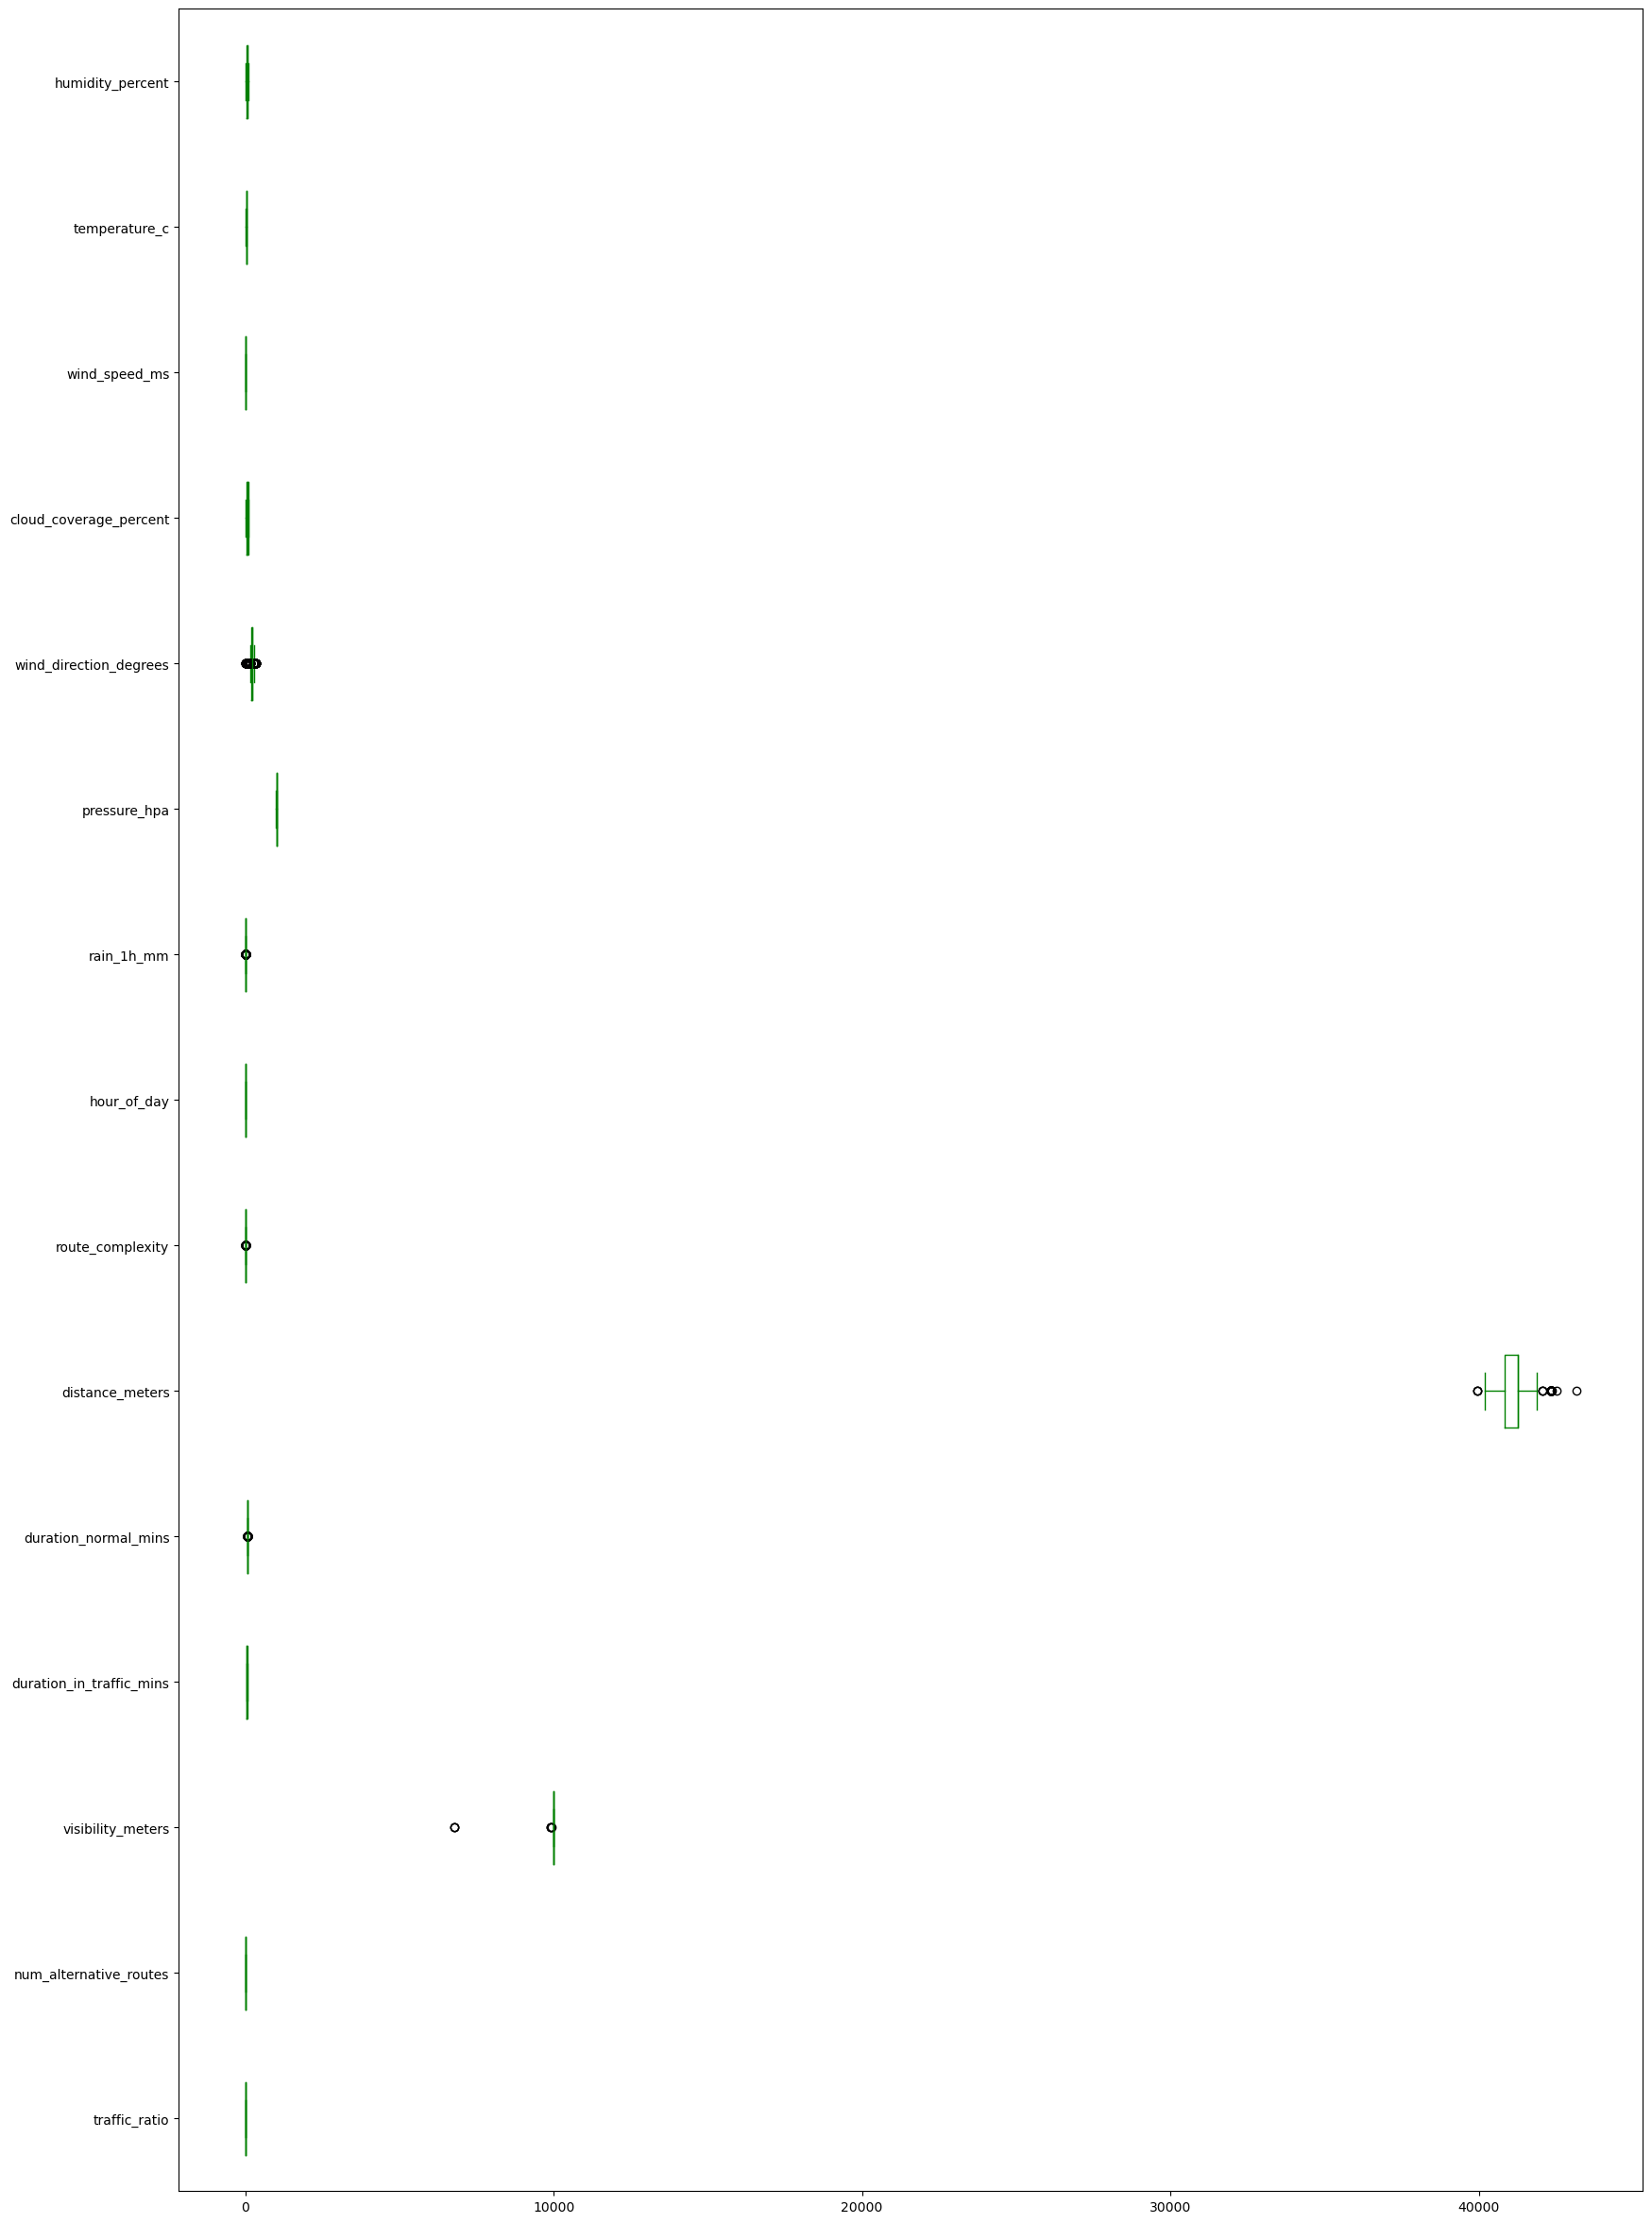

In [33]:
#checking Outliers 
df_selected.plot(kind='box',figsize=(20,30),color='Green',vert=False)
plt.show()